# Income Prediction

This is a 2-class classification problem (income **high** or **low**). There are 32561 instances and 14 features. Target value is the last (income) column, 0 for low income, 1 for high income. There are no missing values, but some values are categorical (like education and marital status). They need to be converted to numerical values (integers) to be processed by most machine learning algorithms.


 You can download the dataset as follows:

In [1]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
url =  "./DATA602repo/income2.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
import pandas as pd
data = pd.read_csv(url, header=None, names=names)


Cloning into 'DATA602repo'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 74 (delta 8), reused 0 (delta 0), pack-reused 54
Receiving objects: 100% (74/74), 7.96 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (24/24), done.



You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Separate features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Using One Hot coding to convert categorical variables to numerical

In [19]:
# Convert categorical variables to numerical using label encoding
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create a pipeline for Random Forest
pipeline_rf = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

# Set parameters for grid search for Random Forest
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15]
}

# Apply GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10, 15],
                         'rf__n_estimators': [100, 200, 300]})

In [23]:
from sklearn.metrics import accuracy_score, classification_report
# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Score:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'rf__max_depth': 15, 'rf__n_estimators': 100}
Best Cross-Validation Score: 0.8636751466253777

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4942
           1       0.78      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



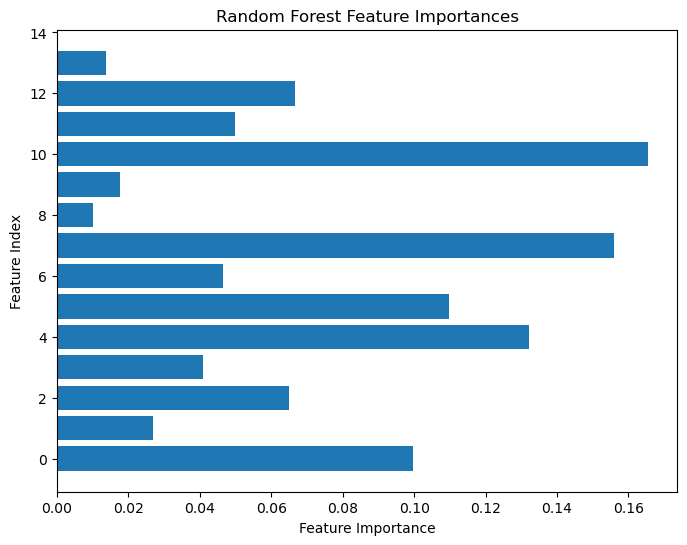

In [24]:
# Plot feature importances
feature_importances = grid_search_rf.best_estimator_['rf'].feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest Feature Importances')
plt.show()


# SVM

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# Create a pipeline for SVM
pipeline_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])

# Set parameters for grid search for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10]
}

# Apply GridSearchCV for SVM
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]})

In [14]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Score:", grid_search_svm.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_svm.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'svm__C': 1, 'svm__gamma': 0.1}
Best Cross-Validation Score: 0.8484723656715512

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.55      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


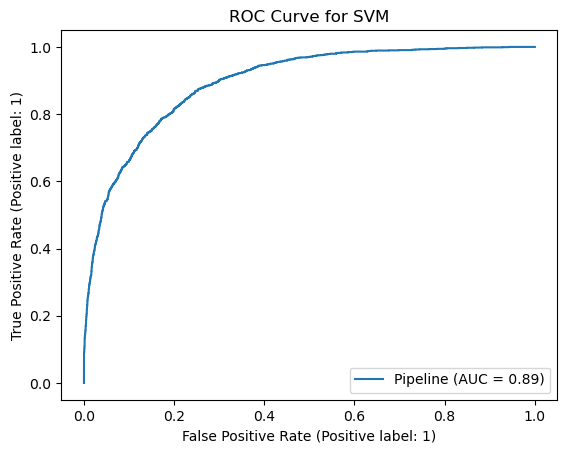

In [15]:

# Plot ROC curve
plot_roc_curve(grid_search_svm.best_estimator_, X_test, y_test)
plt.title('ROC Curve for SVM')
plt.show()


# Logistic Regression

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns


# Create a pipeline for Logistic Regression
pipeline_logreg = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(solver='liblinear'))])

# Set parameters for grid search for Logistic Regression
param_grid_logreg = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logreg__penalty': ['l1', 'l2']
}

# Apply GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__penalty': ['l1', 'l2']})

In [17]:
# Print the best parameters and best score
print("Best Parameters:", grid_search_logreg.best_params_)
print("Best Cross-Validation Score:", grid_search_logreg.best_score_)

# Evaluate the best model on the test set
best_model = grid_search_logreg.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2'}
Best Cross-Validation Score: 0.8246698004229355

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.71      0.46      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.78      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



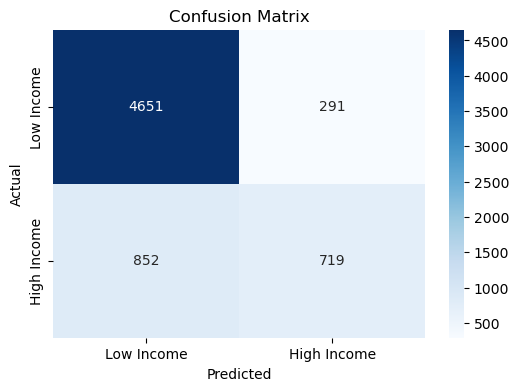

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Income', 'High Income'], yticklabels=['Low Income', 'High Income'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a pipeline for Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [20]:
# Define the hyperparameter grid for grid search
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [21]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Best Cross-Validation Score: 0.834728200011128

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.60      0.65      1571

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



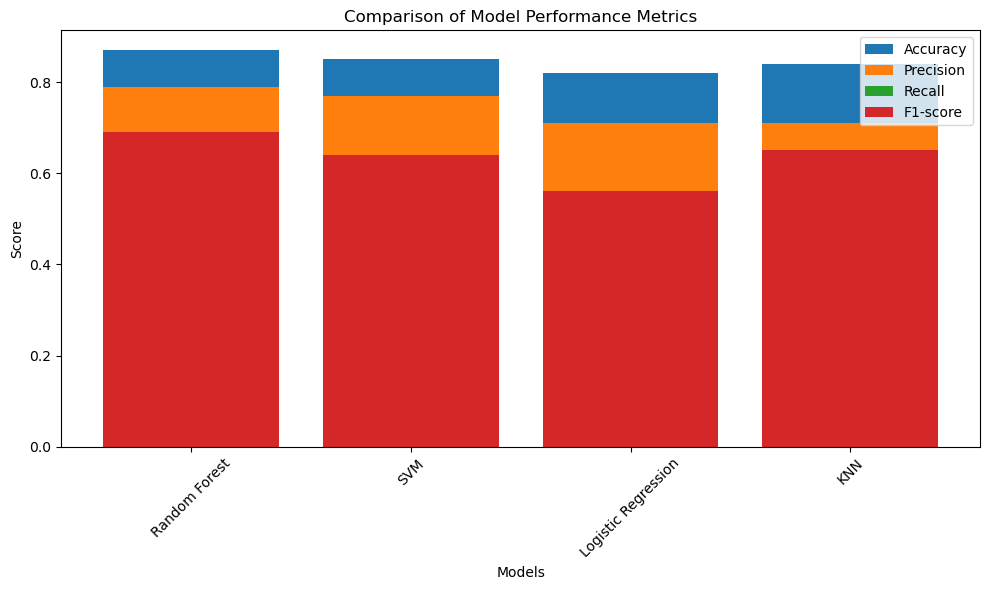

In [25]:
import matplotlib.pyplot as plt

# Evaluation metrics for each model
accuracies = [0.87, 0.85, 0.82, 0.84]
precisions = [0.79, 0.77, 0.71, 0.71]
recalls = [0.62, 0.55, 0.46, 0.60]
f1_scores = [0.69, 0.64, 0.56, 0.65]
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']

# Create a bar chart for each metric
plt.figure(figsize=(10, 6))

plt.bar(models, accuracies, label='Accuracy')
plt.bar(models, precisions, label='Precision')
plt.bar(models, recalls, label='Recall')
plt.bar(models, f1_scores, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
